## Выделяем кусочек магнитограммы с помощью координат HMI

In [1]:
import pickle
import numpy as np 
import os
import pandas as pd 
import time
import datetime
import drms
import urllib
from astropy.time import Time
from datetime import timedelta
import json
import urllib, requests
import matplotlib.pyplot as plt
from astropy.io import fits
from sunpy.coordinates import frames
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
sunspots = pickle.load(urllib.request.urlopen('https://raw.githubusercontent.com/iknyazeva/FitsProcessing/master/sunspot_1996_2017.pkl'))
sunspots.tail(5)

,,number_of_ss,size,class,location,magn_class
date,region,,,,,
2017-12-24,12692,12,90,DAO,N18E03,B
2017-12-25,12692,12,160,EAI,N18W09,B
2017-12-26,12692,7,100,EAO,N18W23,B
2017-12-27,12692,4,30,CRO,N18W35,B
2017-12-28,12692,1,10,AXX,N17W46,A


In [3]:
sunspots.loc['2010-05-01':'2017-12-28'][sunspots['class'].str.contains('ESC')]

,,number_of_ss,size,class,location,magn_class
date,region,,,,,
2011-03-10,11169,22,220,ESC,N20E18,BG
2011-04-19,11193,22,350,ESC,N17E05,B
2013-08-14,11817,22,240,ESC,S21W04,BG
2013-08-15,11817,22,220,ESC,S21W17,B
2013-12-30,11934,17,160,ESC,S18W53,BGD
2014-02-08,11974,26,210,ESC,S13E51,BG
2014-02-26,11982,43,330,ESC,S10W36,BG
2014-02-27,11982,33,320,ESC,S09W50,BG
2014-03-26,12014,22,240,ESC,S13W05,BG


In [4]:
sunspots_byregion = sunspots.swaplevel(0, 1)
sunspots_byregion.loc[11169]

,number_of_ss,size,class,location,magn_class
date,,,,,
2011-03-07,4,30,BXO,N21E56,B
2011-03-08,7,50,DSI,N20E44,B
2011-03-09,11,170,DSO,N19E31,B
2011-03-10,22,220,ESC,N20E18,BG
2011-03-11,15,160,EAI,N20E04,BG
2011-03-12,26,250,EKI,N20W09,BG
2011-03-13,17,260,EKC,N19W22,BG
2011-03-14,17,290,CRO,N20W34,B
2011-03-15,8,360,DAO,N18W47,BG


In [18]:
#Попробуем 11185
DOWNLOAD = True
EMAIL = 'iknyazeva@gmail.com'
SAVE_PATH = 'dataset'
if DOWNLOAD:
    c = drms.Client(email=EMAIL, verbose=True)
    moment= pd.datetime(2011,4,11,0,0)
    str_for_query = 'hmi.m_720s'+ moment.strftime('[%Y.%m.%d_%H:%M:%S_TAI]{magnetogram}')
    print(str_for_query)
    r = c.export(str_for_query, method='url', protocol='fits')
    print(r)
    r.wait()
    print(r.request_url)
    filename ='hmi.m_720s.' +  moment.strftime('%Y%m%d_%H%M%S_TAI.1.magnetogram.fits')
    filepath=os.path.join(SAVE_PATH, filename)

    print("Download data and save to path", filepath)
    r.download(SAVE_PATH, verbose=1) 
else:
    moment= pd.datetime(2011,4,11,0,0)
    str_for_query = 'hmi.m_720s'+ moment.strftime('[%Y.%m.%d_%H:%M:%S_TAI]{magnetogram}')
    filename ='hmi.m_720s.' +  moment.strftime('%Y%m%d_%H%M%S_TAI.1.magnetogram.fits')


hmi.m_720s[2011.04.11_00:00:00_TAI]{magnetogram}
<ExportRequest id="JSOC_20190404_855", status=2>
Export request pending. [id="JSOC_20190404_855", status=2]
Waiting for 5 seconds...
http://jsoc.stanford.edu/SUM76/D1151847356/S00000
Download data and save to path dataset\hmi.m_720s.20110411_000000_TAI.1.magnetogram.fits
    record: hmi.M_720s[2011.04.11_00:00:00_TAI][1]
  filename: hmi.m_720s.20110411_000000_TAI.1.magnetogram.fits
  -> "dataset\hmi.m_720s.20110411_000000_TAI.1.magnetogram.fits"


In [19]:
filename

'hmi.m_720s.20110411_000000_TAI.1.magnetogram.fits'

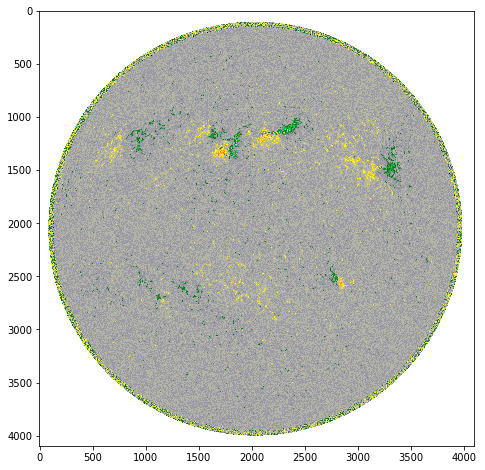

In [32]:
#filename = 'hmi.m_720s.20140517_052400_TAI.1.magnetogram.fits'
with fits.open(os.path.join(SAVE_PATH, filename)) as file_fits: 
    hdulist = file_fits
    hdulist[1].verify("silentfix")
    # нарисуем средствами matplotlib
    data = hdulist[1].data
    plt.figure(figsize  = [8,8])
    plt.imshow(data, cmap = 'hmimag')

## Теперь разбираемся с координатами

In [8]:
import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.map

MetaDict([('simple', True),
          ('bitpix', 32),
          ('naxis', 2),
          ('naxis1', 4096),
          ('naxis2', 4096),
          ('pcount', 0),
          ('gcount', 1),
          ('xtension', 'BINTABLE'),
          ('date', '2012-09-05T08:54:25'),
          ('date-obs', '2011-04-10T23:58:19.40'),
          ('telescop', 'SDO/HMI'),
          ('instrume', 'HMI_SIDE1'),
          ('wavelnth', 6173.0),
          ('camera', 1),
          ('bunit', 'Gauss'),
          ('origin', 'SDO/JSOC-SDP'),
          ('content', 'MAGNETOGRAM'),
          ('quality', 0),
          ('quallev1', 0),
          ('history',
           'Polynomial Coefficients used for Doppler velocity correction: 1.745121e+02 4.963307e-03 -1.227478e-06 4.176721e-10CROTA2 corrected by adding -0.0691 degrees'),
          ('comment',
           'De-rotation: ON; Un-distortion: ON; Re-centering: ON; Re-sizing: OFF; RSUNerr=0.6; correction for cosmic-ray hits'),
          ('bld_vers', '-512'),
          ('hcamid', 2

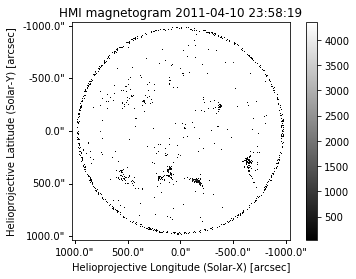

In [74]:
from scipy import ndimage
# mymap = sunpy.map.Map(os.path.join(SAVE_PATH,filename))
filename
data_max = np.nanmax(mymap.data)
mask = mymap.data < data_max*0.009
mymap.mask = mask
mymap.plot()
plt.colorbar()
# data2 = ndimage.gaussian_filter(mymap.data * ~mask, 16)
# data2[data2 < 100] = 0
# mymap2 = sunpy.map.Map(data2, mymap.meta)
# mymap2.plot()
# ndimage.label(mymap2.data)
mymap.meta

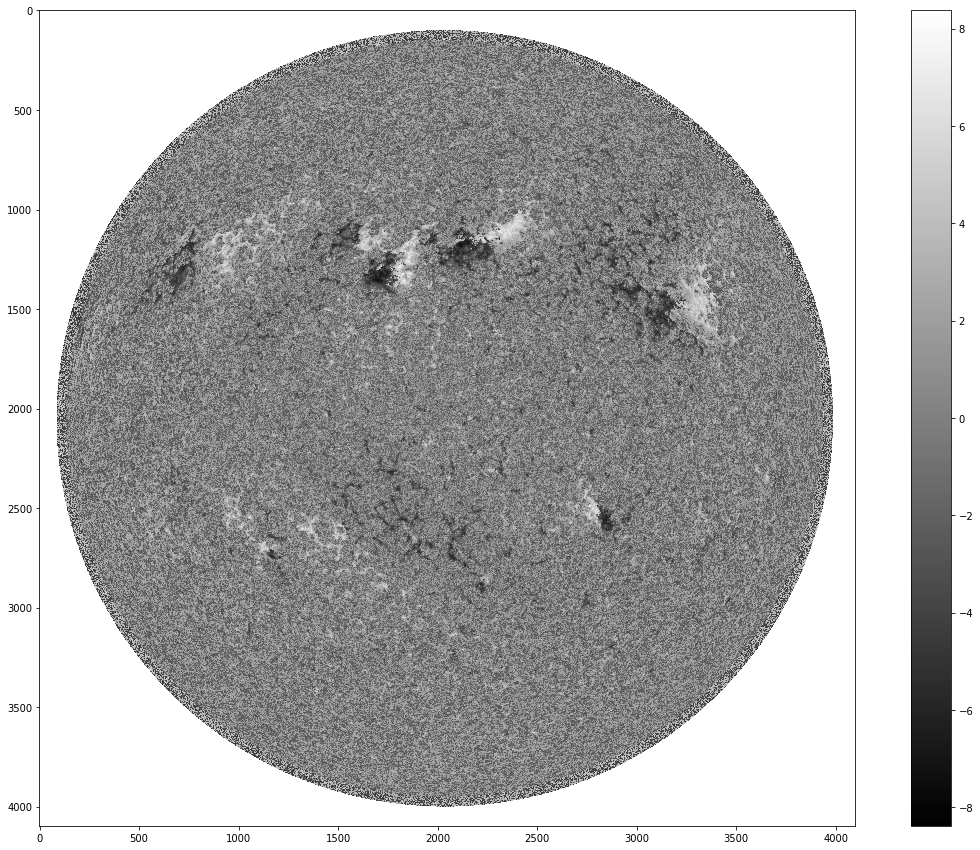

In [44]:
# Ничего не видно, потому что большие поля в областях, в solar monitor ось x развернута 
plt.figure(figsize = (20,15))
data = np.sign(mymap.data)*np.log1p(np.abs(mymap.data))
#mymap.peek()
plt.imshow(data, cmap = 'gray' )
plt.colorbar()

In [ ]:
import matplotlib.image as mpimg

#посмотрим на размеченную картинку с solarmonitor на эту же дату
file_url = 'https://solarmonitor.org/data/2011/04/11/pngs/shmi/shmi_maglc_fd_20110411_111506.png'
DOWNLOAD = True
if DOWNLOAD:
    file_name = urllib.request.urlopen(file_url)
    img=mpimg.imread(file_name)

else:
    file_name = file_url.split(sep='/')[-1]
    img=mpimg.imread(os.path.join(SAVE_PATH, file_name))
plt.figure(figsize = (20,15))
imgplot = plt.imshow(img)

In [38]:
print(mymap.coordinate_frame)

<Helioprojective Frame (obstime=2011-04-10 23:58:19.400000, rsun=696000000.0 m, observer=<HeliographicStonyhurst Coordinate (obstime=2011-04-10 23:58:19.400000): (lon, lat, radius) in (deg, deg, m)
    (0., -5.956699, 1.4987971e+11)>)>


In [39]:
def find_box_coordinate(record = 'N17W08', delta = 6):
    import re
    pattern = re.compile("[NS]\d{2}[EW]\d{2}")
    assert bool(pattern.match(record)), 'Pattern should be in the same format as N20E18'
    if record[0]=='N':
        min_lat = float(record[1:3])-delta
        max_lat = float(record[1:3])+delta
    else:
        min_lat = -float(record[1:3])-delta
        max_lat = -float(record[1:3])+delta
    if record[2]=='W':
        min_lon = float(record[4:])-delta
        max_lon = float(record[4:])+delta
    else:
        min_lon = -float(record[4:])-delta
        max_lon = -float(record[4:])+delta     
    return min_lon, max_lon, min_lat, max_lat    

In [40]:
min_lon, max_lon, min_lat,max_lat = find_box_coordinate(record = 'N17W08', delta = 6)
print('Bounding box coordinates: ', min_lon, max_lon, min_lat, max_lat)

Bounding box coordinates:  -14.0 -2.0 11.0 23.0


Crop region 11185 with location from table


SunPy Map
---------
Observatory:		 SDO
Instrument:		 HMI SIDE1
Detector:		 HMI
Measurement:		 magnetogram
Wavelength:		 6173.0
Observation Date:	 2011-04-10 23:58:19
Exposure Time:		 0.000000 s
Dimension:		 [392. 373.] pix
Coordinate System:	 helioprojective
Scale:			 [0.504298 0.504298] arcsec / pix
Reference Pixel:	 [-60.5625   925.136963] pix
Reference Coord:	 [0. 0.] arcsec
array([[-3.719e+02, -2.781e+02, -2.635e+02, ..., -8.700e+00, -8.300e+00,
         9.000e-01],
       [-5.286e+02, -4.257e+02, -3.522e+02, ...,  4.000e-01, -4.600e+00,
        -5.000e-01],
       [-4.894e+02, -3.687e+02, -2.252e+02, ...,  7.100e+00,  2.700e+00,
         8.300e+00],
       ...,
       [-4.500e+00, -7.600e+00, -8.900e+00, ..., -5.800e+00, -7.100e+00,
        -6.100e+00],
       [ 1.700e+00, -6.200e+00, -5.100e+00, ..., -2.900e+00, -3.000e-01,
        -2.100e+00],
       [-2.800e+00,  1.700e+00, -6.000e+00, ..., -5.300e+00, -3.200e+00,
        -7.900e+00]])

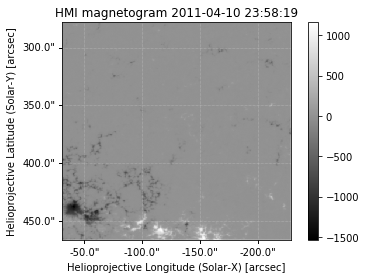

In [41]:
import sunpy.wcs
print('Crop region 11185 with location from table')
bl = sunpy.wcs.convert_hg_hpc(min_lon, min_lat, b0_deg=hdulist[1].header['CRLT_OBS'])
tr = sunpy.wcs.convert_hg_hpc(max_lon, max_lat, b0_deg=hdulist[1].header['CRLT_OBS'])
bottom_left =SkyCoord(bl[0]*u.arcsec, bl[1]*u.arcsec, frame="helioprojective")
top_right = SkyCoord(tr[0] * u.arcsec, tr[1] * u.arcsec, frame="helioprojective")
my_submap = mymap.submap(bottom_left, top_right)
my_submap.peek()
my_submap

In [58]:
import sunpy.wcs
def plot_b0x_by_id(index_, df, hdulist=hdulist):
    
    min_lon = df.minLon.iloc[index_]
    min_lat = df.minLat.iloc[index_]
    max_lon = df.maxLon.iloc[index_]
    max_lat = df.maxLat.iloc[index_]
    bl = sunpy.wcs.convert_hg_hpc(min_lon, min_lat,b0_deg=hdulist[1].header['CRLT_OBS'])
    tr = sunpy.wcs.convert_hg_hpc(max_lon, max_lat,b0_deg=hdulist[1].header['CRLT_OBS'])
    print(f'AR {df.NOAA.iloc[index_]} \n')
    print('Min Lon, min Lat:', bl)
    print('Max Lon, max Lat:', tr)
    bottom_left =SkyCoord(bl[0]*u.arcsec, bl[1]*u.arcsec, frame="helioprojective")
    top_right = SkyCoord(tr[0] * u.arcsec, tr[1] * u.arcsec, frame="helioprojective")
    my_submap = mymap.submap(bottom_left, top_right)
    my_submap.peek()